### Import Packages
### for the shapelet_space package
#### !pip install -i https://test.pypi.org/simple/ shapelet-space==0.1.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import argparse
from shapelet_space import *
from numpy import corrcoef as pcor
from numpy import exp
from numpy import mean
from numpy import log
import random
import numpy as np
import math
import pandas as pd
from numpy import diff
from scipy.interpolate import interp1d
from scipy.spatial.distance import cosine
import time
import importlib

### Instantiate Shapelet Class from shapelet_space package

In [2]:
shapelet = ShapeletSpace()
# To initialize shaplet object with custom params
# shapelet = ShapeletSpace(3, 3, [[0, 1, 2], [2, 3, 4], [1, 1, 1]])

In [3]:
print(shapelet.Number_of_shapelets)

4


In [4]:
print(shapelet.Shapelet_length)

4


In [5]:
print(shapelet.shapelet_array)

[[1, 2, 3, 4], [1, 2, 2, 1], [1, 2, 4, 8], [0, 0, 0, 0]]


### Sample Time Series Shapelet Visualization

<Axes: >

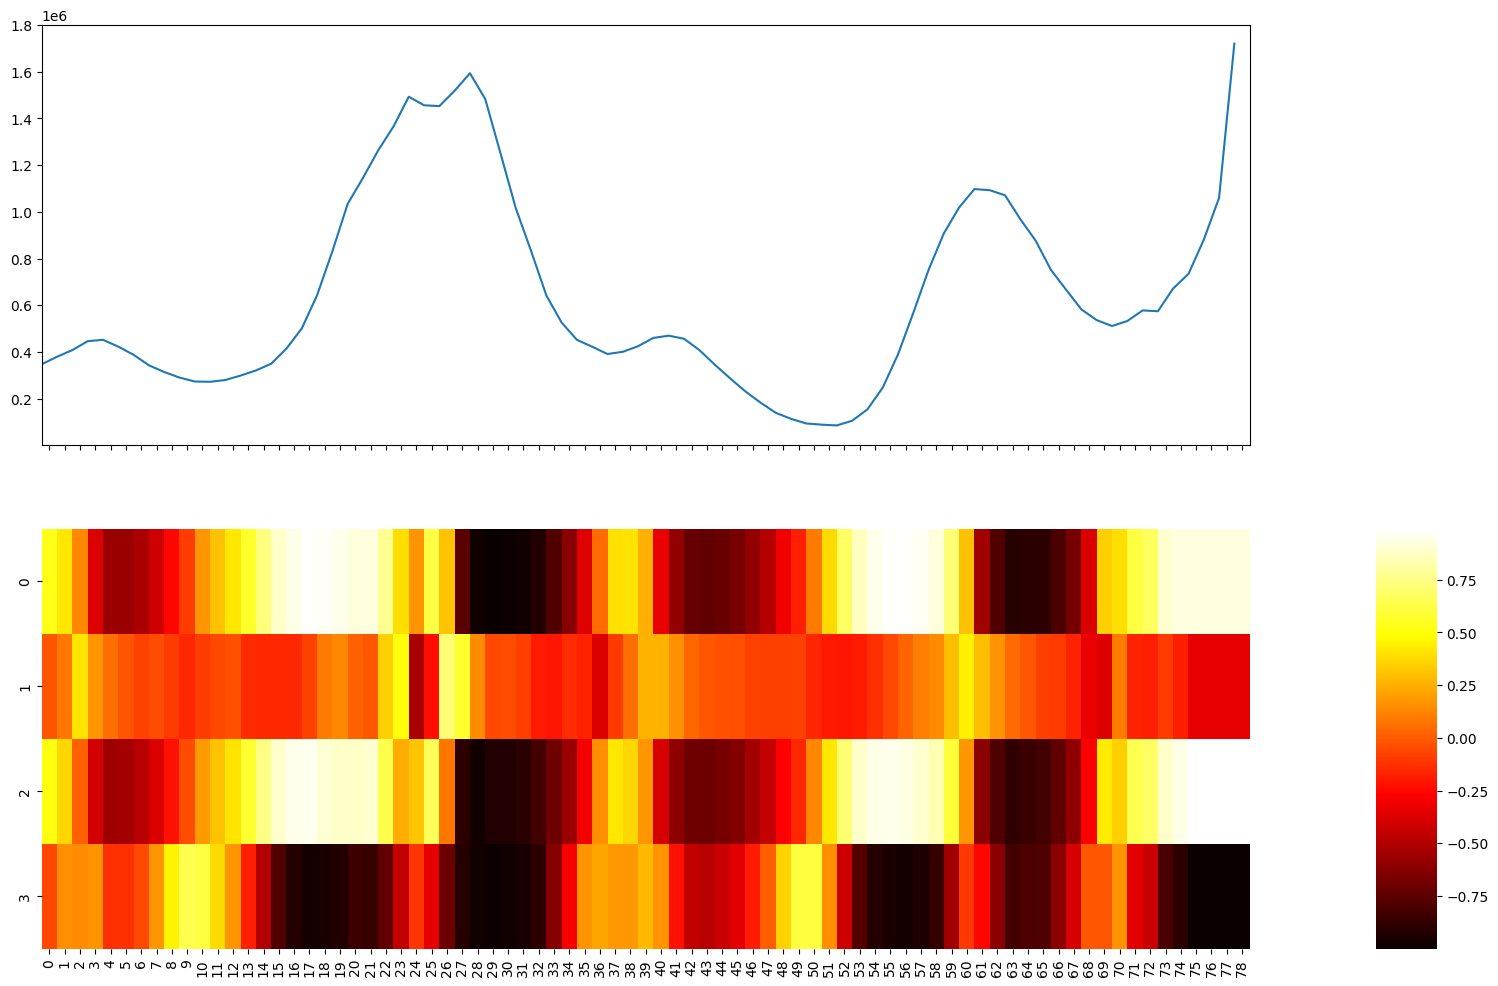

<Figure size 640x480 with 0 Axes>

In [6]:
import seaborn as sns

time_series = [ 347873,  379981,  408488,  446443,  452351,  423100,
        388181,  343304,  314540,  290811,  273840,  272592,
        280230,  299329,  321059,  349835,  414934,  500665,
        642533,  830546, 1033438, 1144914, 1262889, 1365306,
       1492764, 1456160, 1452552, 1518310, 1593263, 1483297,
       1250532, 1015500,  832722,  641966,  525904,  452068,
        422603,  391484,  400992,  424949,  460410,  469997,
        456936,  408827,  346896,  288361,  232440,  183767,
        139974,  114176,   94157,   89204,   85818,  105950,
        154609,  247571,  390043,  567394,  751642,  908103,
       1018844, 1097530, 1092602, 1071038,  968568,  877159,
        752011,  666283,  582269,  536468,  511297,  532844,
        578161,  574516,  672099,  734423,  880669, 1059553,
       1720036 ]

flatness_param = 100000     # 100,000 cases per week to be considered low flatness (\phi = 0.1)
reps = shapelet.find_shapelet_space_ts(time_series, flatness_param) 

fig, ax  = plt.subplots(2, 2, figsize=(18, 12), sharex='col', gridspec_kw={'width_ratios':[100,5]})
ax[0,1].remove()
ax[0,0].plot(time_series)

plt.figure()
sns.heatmap(reps,cmap="hot", square=False, ax=ax[1,0], cbar_ax=ax[1,1])

## Uncomment to set different params or create a new object with different params and get representations

#shapelet.Number_of_shapelets = 3
#shapelet.Shapelet_length = 3
#shapelet.shapelet_array = [[0, 1, 2], [2, 3, 4], [1, 1, 1]]
#reps2 = shapelet.find_shapelet_space_ts(time_series, flatness_param) 


### LOAD DATA

In [7]:
dd = np.genfromtxt("data/flu_sims.csv", delimiter=',') 

In [8]:
dd

array([[7.430e+01, 1.386e+02, 2.660e+02, ..., 3.700e+00, 2.000e+00,
        1.100e+00],
       [7.440e+01, 1.385e+02, 2.634e+02, ..., 2.500e+00, 1.300e+00,
        7.000e-01],
       [7.460e+01, 1.388e+02, 2.619e+02, ..., 1.600e+00, 9.000e-01,
        5.000e-01],
       ...,
       [9.080e+01, 1.960e+02, 4.090e+02, ..., 1.100e+00, 7.000e-01,
        4.000e-01],
       [9.250e+01, 1.916e+02, 3.637e+02, ..., 1.600e+00, 1.100e+00,
        8.000e-01],
       [9.260e+01, 1.911e+02, 3.581e+02, ..., 1.400e+00, 9.000e-01,
        6.000e-01]])

In [9]:
dd.shape

(75, 26)

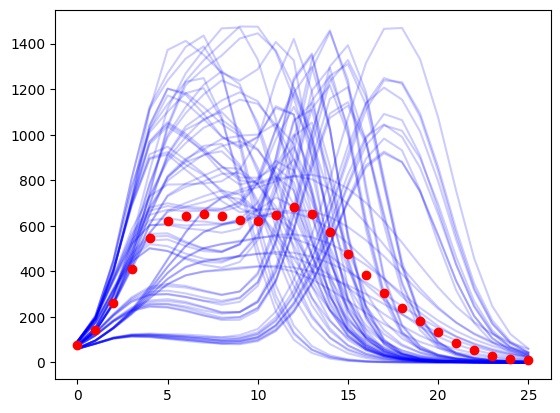

In [10]:
plt.plot(dd.T, color=(0, 0, 1, 0.2))
plt.plot(np.nanmean(dd, axis=0), 'o', color='r')

### Shapelet Transformation

In [11]:
d, w = shapelet.Number_of_shapelets, len(shapelet.shapelet_array[0])
ns, T = dd.shape

# Calculate slope thresholds
slope_time = T
slope_thres = np.zeros(ns)
for cid in range(ns):
    slope_thres[cid] = np.nanmax(np.convolve(np.abs(np.diff(dd[cid, :slope_time])), np.ones(d)/d, mode='valid'))
slope_thres= np.nanmedian(slope_thres)


#shapelet transformation
Number_of_time_series = dd.shape[0]
Time_series_length = dd.shape[1]

start_time = time.time()
all_reps = np.zeros((Number_of_time_series, Time_series_length, shapelet.Number_of_shapelets))
for i in range(Number_of_time_series):
    time_series = dd[i]
    reps = shapelet.find_shapelet_space_ts(time_series,slope_thres)
    all_reps[i, :, :] = reps.T 
end_time = time.time()
print(f"Time taken for shapelet transformation: {end_time - start_time} seconds")

Time taken for shapelet transformation: 0.21804380416870117 seconds


### Visualize Shapelet Transformation

Text(0.5, 1.0, 'Shapelet space visualization')

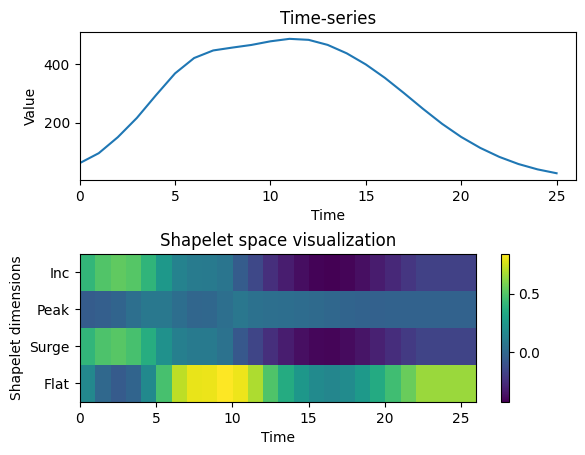

In [12]:
cid = np.random.randint(0, ns)
fig, ax = plt.subplots(2, 1)
ax[0].plot(dd[cid, :])
ax[0].set_xlim([0, all_reps.shape[1]])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Value')
ax[0].set_title('Time-series')

fig.subplots_adjust(hspace=0.5)  # Adjust this value to set the spacing you prefer

img = ax[1].imshow(np.squeeze(all_reps[cid, :, :]).T, aspect='auto', extent=[0, all_reps.shape[1], 0, 4])
fig.colorbar(img, ax=ax[1], orientation='vertical')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Shapelet dimensions')
ax[1].set_yticks([0.5, 1.5, 2.5, 3.5])
ax[1].set_yticklabels(['Flat', 'Surge', 'Peak', 'Inc'])

ax[1].set_title('Shapelet space visualization')

### Similarity Matrix Calculation

In [13]:
win = 30
sim_mat = np.full((ns, ns), np.nan)

start_time = time.time()
print("Computing Similarity Matrix, Please Wait ......................................")
for ii in range(ns):
    for jj in range(ii+1):
        #dtw is a function of shaplet_space package
        sim_mat[ii, jj] = dtw.dtw_cons_md(np.squeeze(all_reps[ii, :, :]).T, np.squeeze(all_reps[jj, :, :]).T, win, 'euc')
end_time = time.time()

print(f"Time taken for similarity matrix computation: {end_time - start_time} seconds")

pd.DataFrame(sim_mat)
# to save the matrix
#pd.DataFrame(sim_mat).to_csv('similarity_matrix.csv', index=False)

Computing Similarity Matrix, Please Wait ......................................
Time taken for similarity matrix computation: 8.926023244857788 seconds


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.352770,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.961196,0.355850,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.360160,0.760658,0.337086,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.030453,1.064521,0.425932,0.301933,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5.290048,6.053266,6.475988,7.177928,7.679034,15.779995,15.892111,16.812618,17.940552,19.147232,...,2.411969,3.732408,6.434538,5.059466,5.198865,0.000000,NaN,NaN,NaN,NaN
71,3.485879,3.730117,3.914621,4.265998,4.403292,11.716740,11.112642,11.396092,12.253948,13.078558,...,0.180780,0.936921,11.657150,8.236240,6.044376,1.775059,0.000000,NaN,NaN,NaN
72,3.115853,2.607081,2.615626,2.684071,3.011534,9.309502,8.629049,8.769764,9.488544,10.158971,...,0.631735,0.131417,14.603398,11.637606,8.313318,3.444057,0.842724,0.000000,NaN,NaN
73,6.114499,6.885581,7.313192,8.467379,8.548158,15.767434,15.755909,16.381281,17.252598,18.051184,...,12.459831,14.532354,0.417294,0.130537,0.882050,6.228992,9.859033,13.198835,0.000000,NaN
